In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Cleaning and Organizing Data

In [5]:
#project 3 data
df = pd.read_csv('new_train_EGN5442.csv')
print(df.head())

   Unnamed: 0  y      x2      x3  x5  x9  x10  x11  x12  x13  ... x23   x24  \
0           0  1  #54359  Female  50   5    5    5    4    3  ...  21  12.0   
1           1  1  #84649  Female  44   1    1    1    1    3  ...   0   0.0   
2           2  0  #59015  Female  72   3    1    5    5    3  ...   0   8.0   
3           3  0  #99990  Female  38   1    3    1    3    5  ...   0   0.0   
4           4  1  #83569    Male  37   5    5    5    5    2  ...   0   0.0   

   x25  x26  x28       x29  x30       x31  x4  x6  
0  D_C   Bt    1   (192&&)  NaN  2.380952   4  50  
1  L_C   Bt    1  (1034&&)  NaN       inf   4  44  
2  L_C   Bt    3  (1452&&)  NaN       inf   4  72  
3  L_C   PT    3   (916&&)  NaN       inf   4  38  
4  L_C   Bt    1   (390&&)  NaN       inf   4  37  

[5 rows x 29 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104722 entries, 0 to 104721
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  104722 non-null  int64  
 1   y           104722 non-null  int64  
 2   x2          104722 non-null  object 
 3   x3          104722 non-null  object 
 4   x5          104722 non-null  int64  
 5   x9          104722 non-null  int64  
 6   x10         104722 non-null  int64  
 7   x11         104722 non-null  int64  
 8   x12         104722 non-null  int64  
 9   x13         104722 non-null  int64  
 10  x14         104722 non-null  object 
 11  x15         104722 non-null  int64  
 12  x16         104722 non-null  int64  
 13  x17         104722 non-null  int64  
 14  x18         104722 non-null  int64  
 15  x19         104722 non-null  int64  
 16  x20         104722 non-null  int64  
 17  x21         104722 non-null  int64  
 18  x22         104722 non-null  int64  
 19  x2

In [7]:
df.describe()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Unnamed: 0,y,x5,x9,x10,x11,x12,x13,x15,x16,...,x20,x21,x22,x23,x24,x28,x30,x31,x4,x6
count,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,104722.000000,...,104722.000000,104722.000000,104722.000000,104722.000000,104410.000000,104722.000000,0.0,1.047220e+05,104722.0,104722.000000
mean,52360.500000,0.431380,39.189273,2.728892,3.062986,2.755591,2.977187,3.201419,3.436317,3.356458,...,3.303909,3.641088,3.285155,14.818405,15.188909,1.976089,NaN,inf,4.0,39.189273
std,30230.781782,0.495271,15.208026,1.326905,1.525021,1.398492,1.277116,1.329776,1.320007,1.333305,...,1.265508,1.175039,1.312749,38.305687,38.785838,0.962887,NaN,NaN,0.0,15.208026
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,9.668508e-03,4.0,7.000000
25%,26180.250000,0.000000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,NaN,3.000000e+00,4.0,27.000000
50%,52360.500000,0.000000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,3.000000,4.000000,3.000000,0.000000,0.000000,2.000000,NaN,NaN,4.0,40.000000
75%,78540.750000,1.000000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,...,4.000000,5.000000,4.000000,12.000000,13.000000,3.000000,NaN,NaN,4.0,51.000000
max,104721.000000,1.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,1592.000000,1584.000000,3.000000,NaN,inf,4.0,85.000000


In [8]:
df.nunique()

,0
Unnamed: 0,104722
y,2
x2,103904
x3,2
x5,75
x9,6
x10,6
x11,6
x12,6
x13,6


In [9]:
#find if string or dateime columns?
#use apply() with user-defined functions or lambda expressions
df.dtypes.apply(lambda x: x == 'object')
df.dtypes.apply(lambda x: 'datetime' in str(x))

,0
Unnamed: 0,False
y,False
x2,False
x3,False
x5,False
x9,False
x10,False
x11,False
x12,False
x13,False


There are no object (string) columns or any datetime columns.

In [10]:
#Missing data
print(df.isna().sum())

Unnamed: 0         0
y                  0
x2                 0
x3                 0
x5                 0
x9                 0
x10                0
x11                0
x12                0
x13                0
x14                0
x15                0
x16                0
x17                0
x18                0
x19                0
x20                0
x21                0
x22                0
x23                0
x24              312
x25                0
x26                0
x28                0
x29                0
x30           104722
x31                0
x4                 0
x6                 0
dtype: int64


In [11]:
#find duplicated rows
print(df.duplicated().sum())

#deal with duplicated data
df.drop_duplicates(inplace=True)

0


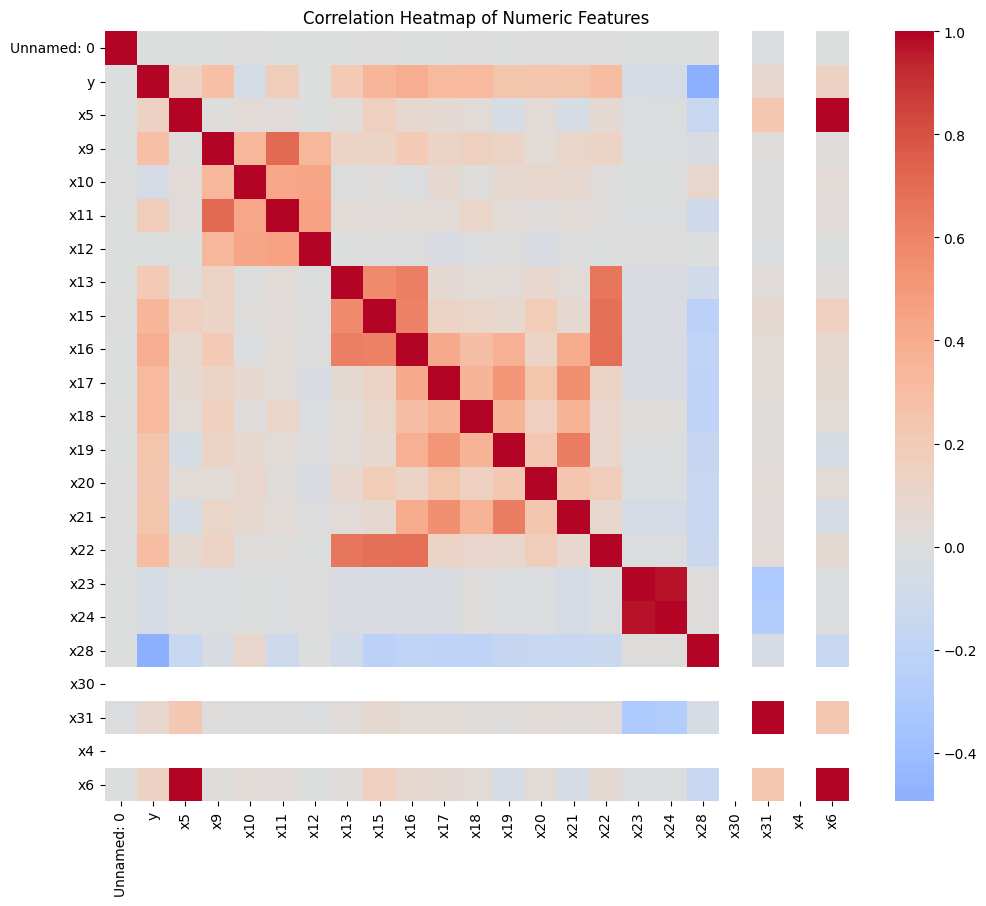

In [12]:
#find highly correlated columns/features among numeric columns
df.select_dtypes(include=['number']).corr()
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [13]:
#can drop highly correlated column

df.drop(columns=['x24'], inplace=True)
print("Shape after dropping x24:", df.shape)

Shape after dropping x24: (104722, 28)


In [ ]:
#exploring categorical data columns - get_dummies() method
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df.shape)

In [ ]:
#explore continous data columns - bin data into some bins or quantiles
df['x5_binned'] = pd.cut(df['x5'], bins=5, labels=False, include_lowest=True)
print("Value counts for 'x5_binned':")
print(df['x5_binned'].value_counts().sort_index())

display(df.head())

Value counts for 'x5_binned':
x5_binned
0    16009
1    33226
2    34813
3    19301
4     1373
Name: count, dtype: int64


,Unnamed: 0,y,x2,x3,x5,x9,x10,x11,x12,x13,...,x23,x25,x26,x28,x29,x31,x4,x6,x5_binned,x23_qcut
0,0,1,#54359,female,50,5,5,5,4,3,...,21,D_C,Bt,1,(192&&),2.380952,4,50,2,1
1,1,1,#84649,female,44,1,1,1,1,3,...,0,L_C,Bt,1,(1034&&),inf,4,44,2,0
2,2,0,#59015,female,72,3,1,5,5,3,...,0,L_C,Bt,3,(1452&&),inf,4,72,4,0
3,3,0,#99990,female,38,1,3,1,3,5,...,0,L_C,PT,3,(916&&),inf,4,38,1,0
4,4,1,#83569,male,37,5,5,5,5,2,...,0,L_C,Bt,1,(390&&),inf,4,37,1,0


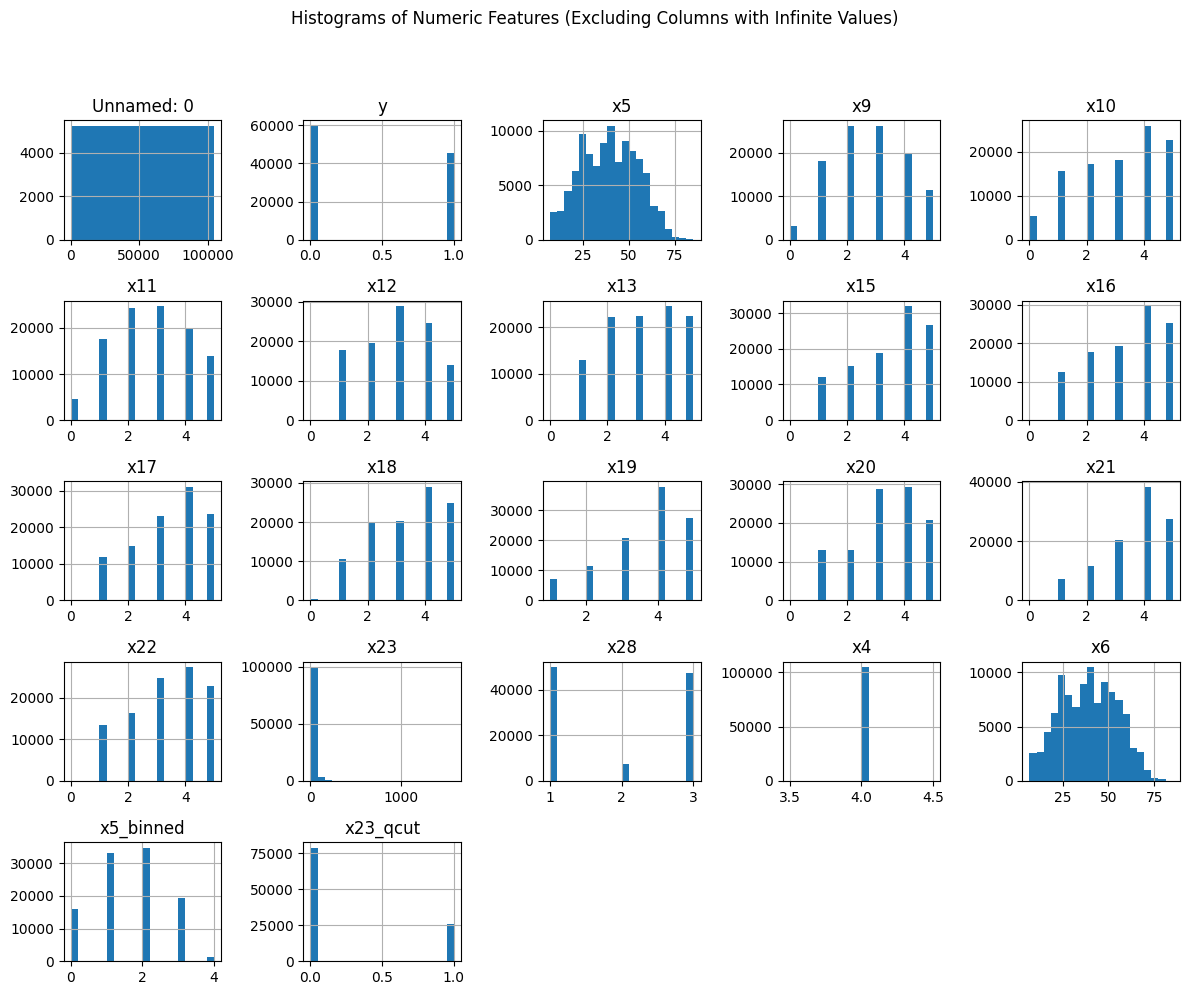

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = df.select_dtypes(include='number').columns

# Exclude columns with infinite values before plotting histograms
finite_num_cols = [col for col in num_cols if not np.isinf(df[col]).any()]

df[finite_num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numeric Features (Excluding Columns with Infinite Values)", y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

In [ ]:
#export data to csv


In [ ]:
df.to_csv('cleaned_new_train_EGN5442.csv', index=False)
print("DataFrame exported to 'cleaned_new_train_EGN5442.csv'")